In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
import seaborn as sns

## Prepping Data

In [2]:
original_df = pd.read_csv('../../data/infdata_stage1.csv')
df = original_df
pd.set_option('display.max_rows', 200)
len(df.index)

5912

In [3]:
y = df['Winner']
X = df.drop(columns = ['Winner','R_DOB', 'B_DOB'])

## Univariate Selection

In [4]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(k=10)

In [5]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 57 123] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [6]:
len(dfcolumns)

157

In [7]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', kind="quicksort", ascending=False)

# print(featureScores)

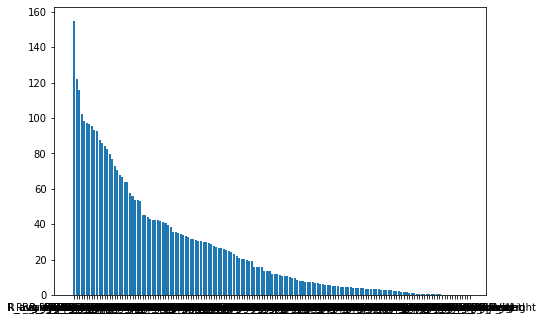

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(featureScores['Specs'],featureScores['Score'])
plt.show()

In [9]:
smallest = featureScores[featureScores['Score'] < 50]
smallest

,Specs,Score
66,B_Weight_lbs,45.270568
71,R_avg_TD_pct,45.247722
13,B_avg_opp_SIG_STR_att,44.181559
70,R_avg_opp_SIG_STR_pct,42.664571
29,B_avg_opp_BODY_att,42.561146
141,weight_class_OpenWeight,42.489340
121,R_wins,42.207688
49,B_total_time_fought(seconds),41.761700
109,R_avg_GROUND_att,41.081479
102,R_avg_DISTANCE_landed,40.640657


In [10]:
#removing columns that have low scores
print(len(df.columns))
for col in smallest['Specs']:
    df = df.drop(columns = col)
print(len(df.columns))


160
32


In [11]:
df.to_csv('../../data/infdata_stage2.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../data/JMpreprocessed_UnivariateSelecton_<50.csv'

## Feature Importance

In [ ]:
# df = original_df
# len(df.columns)

In [ ]:
# model = ExtraTreesClassifier()
# model.fit(X,y)
# # print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

In [ ]:
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(len(df.columns)).plot(kind='barh')
# plt.show()

In [ ]:
# smallest = feat_importances[feat_importances < .0078]
# smallest

In [ ]:
# #removing columns that have low scores
# print(len(df.columns))
# for col in smallest.index:
#     df = df.drop(columns = col)
# print(len(df.columns))

In [ ]:
# df.to_csv('../data/JMpreprocessed_FeatureImportance_<.0078.csv', index=False)

## Correlation Matrix w Heatmap

In [ ]:
# corrmat = df.corr()
# top_corr_features = corrmat.index
# c = df[top_corr_features].corr().abs()

# s = c.unstack()
# so = s.sort_values(kind="quicksort", ascending=False, na_position='last')
# so = so[so != 1]
# so[0:20]

In [ ]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(range(0, len(so)), so)
# plt.show()